In [1133]:
# Her er de ændringer jeg har lavet/skal laves:

# 1) Har fjernet set.style fra første celle
# 2) Har indsat en chunk kode i cellen nedenunder, som ændrer fonten til LaTeX font 
# 3) Indsæt gridlines i alle plots. Gør det med følgende:
# ax.grid(alpha = 0.5)
# ax.set_axisbelow(True)
# 4) Ovenstående er gjort/skal gøres for det andet dokument også
# 5) Har lavet en filepath, så vi let kan gemme figurerne et sted
# Der er dog et problem - vores subplots med fx 10 histogrammer er gigantiske store - hvis det skal passe ind i LaTeX dokumentet,
# så skal vi skalere det så meget ned, at teksten i plotsene bliver meget lille. Er nok nødt til at gøre intervaller for akser
# mindst muligt
# 6) OBS! Hvis der fx står "%" i figuren, så forstår Python det ikke efter font ændring - du skal skrive \% i figurer  
# - så virker det
# 7) For at gemme figur, skriv plt.savefig(filepath + "\\FigurNavn.pdf") - så lagres den i mappen "Figurer"
# Den kan godt give en bug, når figurer laves - men fonten ændres alligevel
# 8) Til slut har jeg indsat pd.set_option(...) i begge dokumenter, så vi nemt kan kopiere DataFrames til LaTeX med 4 decimaler

In [1134]:
import sys
sys.path.insert(0,"C:\\Coding\\Local_repositories\\Exammmmm\\")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import optimize

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

filepath = "C:\\Coding\\Local_repositories\\Exammmmm\\Figures"

pd.set_option('display.float_format', '{:.4f}'.format) # 4 decimals are shown in pandas DataFrames

from codelib.visualization.base import fan_chart
from codelib.portfolio_optimization.views import weighted_percentile

# Optimizing portfolios

In [1135]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [1136]:
# Linear and cumulative returns and log returns

lin_ret = {}
cum_lin_ret = {}
log_ret = {}
cum_log_ret = {}

for i in asset:
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1
    log_ret[i] = np.log(asset[i][:] / asset[i][:].shift(1))
    cum_log_ret[i] = log_ret[i].cumsum()

In [1137]:
# Descriptive stats 1 year horizon

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
oneypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
oneyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    oneypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    oneypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    oneypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    oneypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    oneypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    oneypricedescr["Median"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.5))
    oneypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    oneyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    oneyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    oneyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    oneyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    oneyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    oneyretdescr["Median"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.5))
    oneyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(oneypricedescr.to_latex())
print(oneyretdescr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   Mean & Standard deviation & Skewness & Kurtosis & 5th percentile & Median & 95th percentile \\
\midrule
1  & 1.0928 &             0.1900 &   0.1605 &   0.2851 &         0.7843 & 1.0887 &          1.4121 \\
2  & 1.0955 &             0.1926 &   0.1857 &   0.2655 &         0.7875 & 1.0922 &          1.4211 \\
3  & 1.0919 &             0.1917 &   0.1972 &   0.2391 &         0.7830 & 1.0871 &          1.4098 \\
4  & 1.0851 &             0.1813 &   0.1584 &   0.3941 &         0.7892 & 1.0803 &          1.3891 \\
5  & 1.0702 &             0.1533 &   0.0409 &   0.3449 &         0.8149 & 1.0695 &          1.3218 \\
6  & 1.0632 &             0.1401 &  -0.0753 &   0.3382 &         0.8277 & 1.0645 &          1.2901 \\
7  & 1.0618 &             0.1404 &  -0.0667 &   0.3088 &         0.8232 & 1.0655 &          1.2845 \\
8  & 1.0566 &             0.1275 &  -0.1336 &   0.3655 &         0.8394 & 1.0579 &          1.2598 \\
9  & 1.0561 &             0.1280 &  -0

In [1138]:
# Descriptive stats 5 year horizon

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
fiveypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
fiveyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    fiveypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    fiveypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    fiveypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    fiveypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    fiveypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    fiveypricedescr["Median"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.5))
    fiveypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    fiveyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    fiveyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    fiveyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    fiveyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    fiveyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    fiveyretdescr["Median"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.5))
    fiveyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(fiveypricedescr.to_latex())
print(fiveyretdescr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   Mean & Standard deviation & Skewness & Kurtosis & 5th percentile & Median & 95th percentile \\
\midrule
1  & 1.5443 &             0.6305 &   1.0529 &   1.8807 &         0.7119 & 1.4438 &          2.7100 \\
2  & 1.5443 &             0.6291 &   1.1069 &   2.4278 &         0.7119 & 1.4458 &          2.7097 \\
3  & 1.5359 &             0.6184 &   1.0946 &   2.2520 &         0.7269 & 1.4373 &          2.6963 \\
4  & 1.4890 &             0.5692 &   0.9917 &   1.8106 &         0.7178 & 1.4069 &          2.5494 \\
5  & 1.3902 &             0.4552 &   0.8096 &   1.4207 &         0.7508 & 1.3366 &          2.2174 \\
6  & 1.3488 &             0.4106 &   0.7430 &   1.1213 &         0.7598 & 1.3046 &          2.0770 \\
7  & 1.3425 &             0.4066 &   0.7433 &   1.2455 &         0.7610 & 1.2986 &          2.0693 \\
8  & 1.3074 &             0.3646 &   0.5564 &   0.5153 &         0.7713 & 1.2718 &          1.9676 \\
9  & 1.3039 &             0.3608 &   0

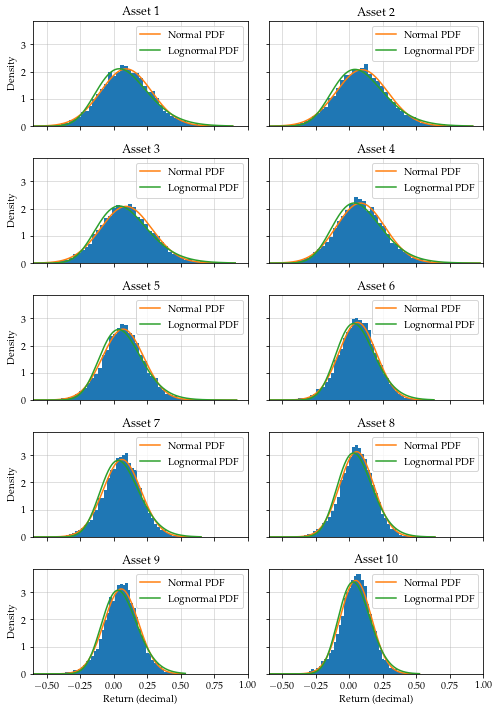

In [1139]:
# 1 year return distributions

horizon = 1
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (7, 10), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()
    
    ax[j][k].grid(alpha = 0.5)
    ax[j][k].set_axisbelow(True)

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

ax[0][0].set_xlim(-0.6, 1)

plt.tight_layout()
plt.savefig(filepath + "\\1_yr_lin_ret_distribution.pdf")
plt.show()

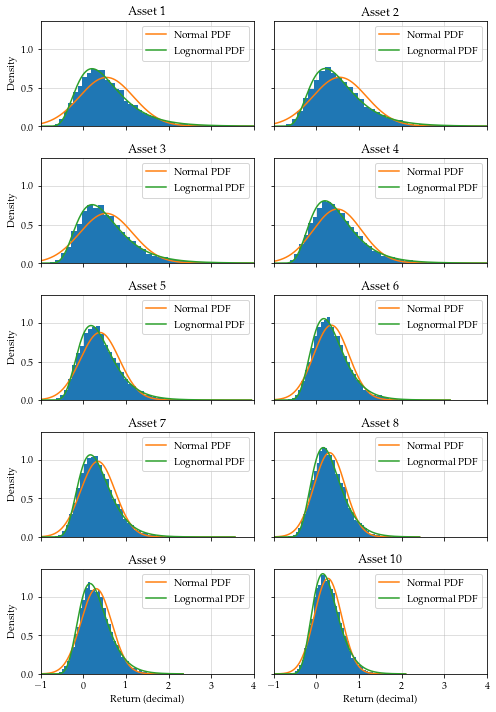

In [1140]:
# 5 year return distributions

horizon = 5
lims = [-0.75, 0.75]
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (7, 10), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

    ax[j][k].grid(alpha = 0.5)
    ax[j][k].set_axisbelow(True)

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

ax[0][0].set_xlim(-1, 4)

plt.tight_layout()
plt.savefig(filepath + "\\5_yr_lin_ret_distribution.pdf")
plt.show()

In [1141]:
# Equally weighted

pf_ew_ret = (lin_ret[1] + lin_ret[2] + lin_ret[3] + lin_ret[4] + lin_ret[5] + lin_ret[6] + lin_ret[7] + lin_ret[8] + lin_ret[9] + lin_ret[10]) / len(lin_ret)
pf_ew_price = ((pf_ew_ret + 1).cumprod() - 1).fillna(0) + 1
pf_ew_price_np = pf_ew_price.to_numpy()

# Buy and hold

pf_bh_price = (asset[1] + asset[2] + asset[3] + asset[4] + asset[5] + asset[6] + asset[7] + asset[8] + asset[9] + asset[10]) / len(asset)
pf_bh_price_np = pf_bh_price.to_numpy()

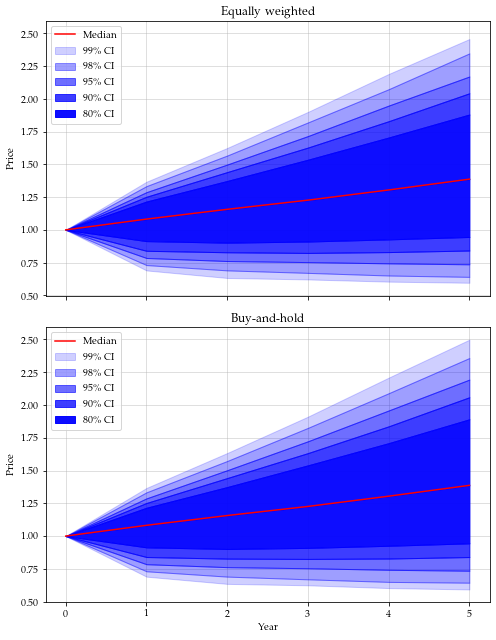

In [1142]:
# Plot of prices

x = np.linspace(0, 5, 6)

percentiles_pf_ew_price_np = np.percentile(pf_ew_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fig, ax = plt.subplots(2, 1, figsize=(7, 9), sharex = True, sharey = True)

fan_chart(x,
          percentiles_pf_ew_price_np,
          labels=['99\% CI', '98\% CI', '95\% CI', '90\% CI', '80\% CI', 'Median'],
          ax = ax[0])

ax[0].set_ylabel("Price")
ax[0].set_title("Equally weighted")

ax[0].legend(loc='upper left');

percentiles_pf_bh_price_np = np.percentile(pf_bh_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fan_chart(x,
          percentiles_pf_bh_price_np,
          labels=['99\% CI', '98\% CI', '95\% CI', '90\% CI', '80\% CI', 'Median'],
          ax = ax[1])

ax[0].grid(alpha = 0.5)
ax[0].set_axisbelow(True)

ax[1].grid(alpha = 0.5)
ax[1].set_axisbelow(True)
ax[1].set_ylabel("Price")

ax[1].set_xlabel("Year")

ax[1].set_title("Buy-and-hold")

ax[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig(filepath + "\\EW_and_BH_price_development.pdf")
plt.show()

In [1143]:
# Equally weighted returns and cumulative returns

pf_ew_ret = pf_ew_price / pf_ew_price.shift(1) - 1
pf_ew_cum_ret = (1 + pf_ew_ret).cumprod() - 1

# Buy and hold returns and cumulative returns

pf_bh_ret = pf_bh_price / pf_bh_price.shift(1) - 1
pf_bh_cum_ret = (1 + pf_bh_ret).cumprod() - 1

In [1144]:
# 1 year portfolio returns descriptive statistics for both EW and BH

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
oneypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

oneypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

oneypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [1145]:
oneypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.0723,0.1227,-0.5305,0.8090,-0.1597,-0.2290
BH,0.0723,0.1227,-0.5305,0.8090,-0.1597,-0.2290


In [1146]:
# 5 year portfolio returns descriptive statistics for both EW and BH

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
fiveypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

fiveypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

fiveypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [1147]:
fiveypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.4042,0.3671,0.3823,0.4094,-0.1576,-0.2793
BH,0.4075,0.3726,0.4184,0.4678,-0.1599,-0.2800


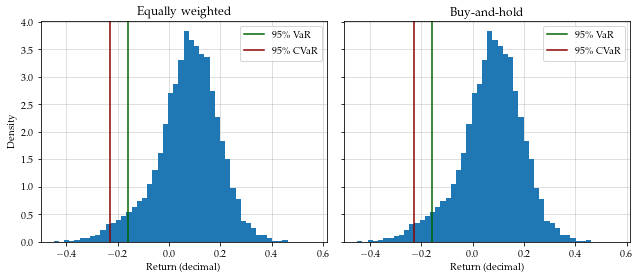

In [1148]:
# 1 year portfolio returns distributions for both EW and BH

horizon = 1
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (9, 4), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(oneypfdescr["95% VaR"].loc["EW"], label = "95\% VaR", color = "darkgreen")
ax[0].axvline(oneypfdescr["95% CVaR"].loc["EW"], label = "95\% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(oneypfdescr["95% VaR"].loc["BH"], label = "95\% VaR", color = "darkgreen")
ax[1].axvline(oneypfdescr["95% CVaR"].loc["BH"], label = "95\% CVaR", color = "darkred")
ax[1].set_title("Buy-and-hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

ax[0].grid(alpha = 0.5)
ax[0].set_axisbelow(True)

ax[1].grid(alpha = 0.5)
ax[1].set_axisbelow(True)

plt.tight_layout()
plt.savefig(filepath + "\\1yr_EW_BH_return_dist.pdf")
plt.show()

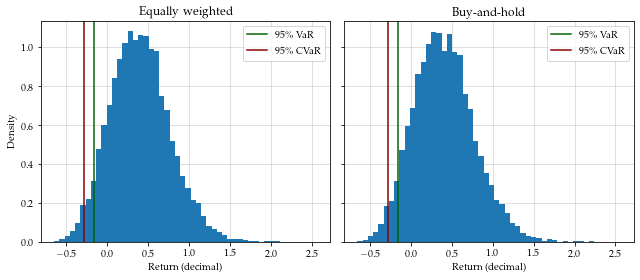

In [1149]:
# 5 year portfolio returns distributions for both EW and BH

horizon = 5
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (9, 4), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(fiveypfdescr["95% VaR"].loc["EW"], label = "95\% VaR", color = "darkgreen")
ax[0].axvline(fiveypfdescr["95% CVaR"].loc["EW"], label = "95\% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(fiveypfdescr["95% VaR"].loc["BH"], label = "95\% VaR", color = "darkgreen")
ax[1].axvline(fiveypfdescr["95% CVaR"].loc["BH"], label = "95\% CVaR", color = "darkred")
ax[1].set_title("Buy-and-hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

ax[0].grid(alpha = 0.5)
ax[0].set_axisbelow(True)

ax[1].grid(alpha = 0.5)
ax[1].set_axisbelow(True)

plt.tight_layout()
plt.savefig(filepath + "\\5yr_EW_BH_return_dist.pdf")
plt.show()

In [1150]:
# The dictionary is converted into a 3D numpy array

cum_lin_ret_np = np.array(list(cum_lin_ret.values())).T

## Optimal portfolio weights (buy and hold) 

In [1151]:
# Minimization of standard deviation

# Objective function

def OptPFWeightsMinStd(w: np.array, horizon: int, cum_lin_ret_np: np.array):
    """Finds standard deviation of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return pf_return[horizon, :].std(ddof=1)

# Minimization of CVaR

# Objective function

def OptPFWeightsMinCVaR(w: np.array, horizon: int, cum_lin_ret_np: np.array, alpha: int = 95):
    """Finds CVaR of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return -np.mean(pf_return[horizon, :][pf_return[horizon, :] <= np.percentile(pf_return[horizon, :], (100 - alpha))])

# Minimization of CVaR using Rockafeller and Uryasev (2000) approach

# Objective function

def OptPFWeightsRockafellerCVaR(x: np.array, horizon: int, cum_lin_ret_np: np.array, beta: int = 0.95):

    w = x[0:-1]
    alpha = x[-1]
    
    pf_return = (cum_lin_ret_np @ w).T
    
    tail_scenarios = np.maximum(-pf_return[horizon, :] - alpha, 0.0)
    
    obj_func = alpha + np.sum(tail_scenarios) / (len(pf_return.T)*(1-beta)) 
    
    return obj_func

### 1 year horizon

In [1152]:
# Constraints

target = 0.08

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [1153]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwstdoney.x.round(4))
print(optwstdoney)

[0.1145 0.186  0.1068 0.1779 0.1637 0.0633 0.1067 0.0183 0.0628 0.    ]
     fun: 0.13408992086859856
     jac: array([0.15516199, 0.15964024, 0.1537143 , 0.14252514, 0.11796832,
       0.10643213, 0.10417976, 0.0955227 , 0.09468915, 0.08636537])
 message: 'Optimization terminated successfully'
    nfev: 242
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([1.14478899e-01, 1.85962138e-01, 1.06829870e-01, 1.77949054e-01,
       1.63693119e-01, 6.32872831e-02, 1.06671571e-01, 1.82899428e-02,
       6.28381235e-02, 4.25718759e-18])


In [1154]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwcvaroney.x.round(4))
print(optwcvaroney)

[0.     0.2435 0.1194 0.2472 0.1866 0.     0.0376 0.0169 0.1489 0.    ]
     fun: 0.23969627708029673
     jac: array([0.26623923, 0.26667269, 0.26055045, 0.24878426, 0.22258551,
       0.21382462, 0.20787521, 0.19861704, 0.19789748, 0.18761318])
 message: 'Optimization terminated successfully'
    nfev: 270
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([1.00019129e-21, 2.43512130e-01, 1.19351442e-01, 2.47224428e-01,
       1.86564426e-01, 4.21988067e-19, 3.75782421e-02, 1.69114757e-02,
       1.48857855e-01, 1.28896768e-18])


#### 1 year horizon Rockafeller and Uryasev (2000) CVaR implemented separately

In [1155]:
# Rockafeller CVaR constraints (specified in the same way as those above)

target = 0.08

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

In [1156]:
# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockafoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwrockafoney.x.round(4))
print(optwrockafoney)

[0.     0.2466 0.122  0.2416 0.1841 0.     0.0337 0.0206 0.1513 0.
 0.1662]
     fun: 0.2396952163193287
     jac: array([0.26543129, 0.26609267, 0.25959914, 0.24792203, 0.22213993,
       0.2131795 , 0.20723719, 0.19827909, 0.19732397, 0.18715566,
       0.004     ])
 message: 'Optimization terminated successfully'
    nfev: 508
     nit: 39
    njev: 39
  status: 0
 success: True
       x: array([1.18252429e-17, 2.46619943e-01, 1.22008501e-01, 2.41624203e-01,
       1.84118493e-01, 1.13826553e-19, 3.36968599e-02, 2.06312399e-02,
       1.51300760e-01, 4.47223708e-18, 1.66217534e-01])


In [1157]:
# Very similar portfolios weights compared to the standard CVaR minimization approach

### 5 year horizon

In [1158]:
# Constraints

target = 0.45

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [1159]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwstdfivey.x.round(4))
print(optwstdfivey)

[0.0832 0.14   0.1405 0.1922 0.1922 0.0599 0.1293 0.     0.0627 0.    ]
     fun: 0.41081205429599843
     jac: array([0.50513937, 0.50508624, 0.49670736, 0.44981409, 0.35103267,
       0.30963448, 0.30327953, 0.26988712, 0.26471287, 0.23801964])
 message: 'Optimization terminated successfully'
    nfev: 176
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([8.32074486e-02, 1.39995802e-01, 1.40513259e-01, 1.92209483e-01,
       1.92156028e-01, 5.99192910e-02, 1.29324059e-01, 4.41431220e-18,
       6.26746294e-02, 5.36722427e-18])


In [1160]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwcvarfivey.x.round(4))
print(optwcvarfivey)

[0.     0.1267 0.2317 0.223  0.1904 0.0124 0.1125 0.     0.0828 0.0205]
     fun: 0.2889336268470253
     jac: array([0.32163056, 0.32086999, 0.31752779, 0.30148844, 0.26931952,
       0.25436537, 0.25322492, 0.24574972, 0.23993669, 0.22855353])
 message: 'Optimization terminated successfully'
    nfev: 351
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([2.19033996e-18, 1.26735776e-01, 2.31731107e-01, 2.22994882e-01,
       1.90372912e-01, 1.23512949e-02, 1.12531067e-01, 0.00000000e+00,
       8.27740705e-02, 2.05088900e-02])


#### 5 year horizon Rockafeller and Uryasev (2000) CVaR implemented separately

In [1161]:
# Rockafeller CVaR constraints (specified in the same way as those above)

target = 0.45

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

In [1162]:
# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaffivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwrockaffivey.x.round(4))
print(optwrockaffivey)

[0.     0.1268 0.2316 0.2233 0.19   0.0125 0.1127 0.     0.082  0.0212
 0.1648]
     fun: 0.28893363371663694
     jac: array([0.32173808, 0.3206978 , 0.31725688, 0.30063622, 0.26923664,
       0.25478231, 0.25289645, 0.24569065, 0.2398249 , 0.22864546,
       0.002     ])
 message: 'Optimization terminated successfully'
    nfev: 360
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([6.48898227e-20, 1.26793528e-01, 2.31608846e-01, 2.23312968e-01,
       1.89977687e-01, 1.25082043e-02, 1.12674474e-01, 5.04600443e-20,
       8.19726512e-02, 2.11516409e-02, 1.64828528e-01])


In [1163]:
# Very similar portfolios weights compared to the standard CVaR minimization approach

# Plotting the optimal portfolio weights

### 1 year horizon

In [1164]:
# One year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.05, 0.09, 21)
opt_weight_std_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdoney.x.round(4)
    
    opt_weight_std_one_year.append(optwstdoney.x)

In [1165]:
# One year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.05, 0.09, 21)
opt_weight_CVaR_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvaroney.x.round(4)
    
    opt_weight_CVaR_one_year.append(optwcvaroney.x)

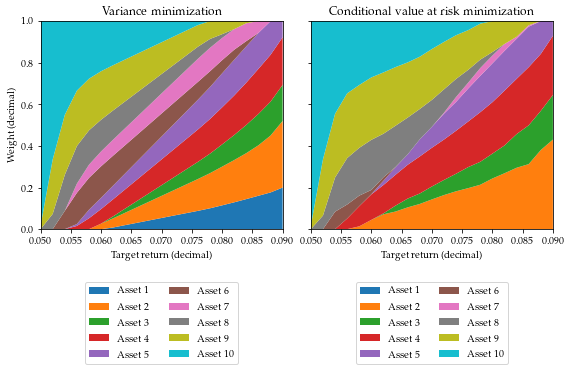

In [1166]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (8, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);
ax[0].set_title("Variance minimization")

ax[1].stackplot(targets, np.array(opt_weight_CVaR_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")
ax[1].set_title("Conditional value at risk minimization")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);

fig.tight_layout()
plt.savefig(filepath + "\\1y_pf_var_cvar_weights_varying_target_return.pdf", bbox_inches='tight')
plt.show()

### 5 year horizon

In [1167]:
# Five year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.3, 0.5, 41)
opt_weight_std_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdfivey.x.round(4)
    
    opt_weight_std_five_years.append(optwstdfivey.x)

In [1168]:
# Five year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.3, 0.5, 41)
opt_weight_CVaR_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvarfivey.x.round(4)
    
    opt_weight_CVaR_five_years.append(optwcvarfivey.x)

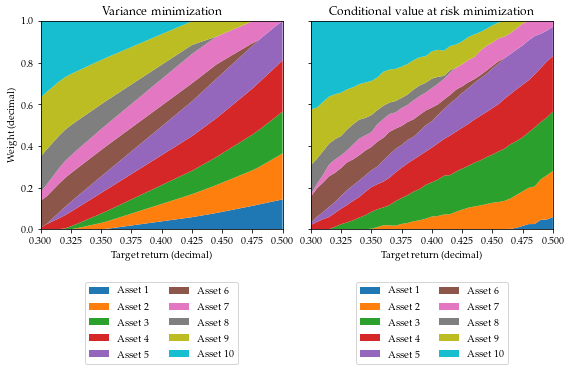

In [1169]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (8, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);
ax[0].set_title("Variance minimization")

ax[1].stackplot(targets, np.array(opt_weight_CVaR_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")
ax[1].set_title("Conditional value at risk minimization")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);

fig.tight_layout()
plt.savefig(filepath + "\\5y_pf_var_cvar_weights_varying_target_return.pdf", bbox_inches='tight')
plt.show()

# Views according to Meucci - Fully Flexible Views: Theory and Practice

In [1170]:
# Idea: We wish to maximize the Lagrangian dual function w.r.t. the Lagrangian multiplier, v.
# Once v is estimated, we can use it to calculate p_thilde - the new probabilities that make sure our view is satisfied by 
# ultimately changing the prior distribution so that we obtain a posterior distribution, which 1) satisfies our view while 2)
# also being as similar to the prior distribution as possible
# The optimization problem here stems from the fact that we wish to minimize the relative entropy, i.e., the difference between
# the prior and posterior distributions
# When p tilde changes, it corresponds to a change in the FREQUENCY of a given return/price - not the size of the actual 
# return/price

# Function to calculate the new probabilities

def calculate_p_tilde(v, p, H_matrix):
    
    temp = np.log(p) - 1.0 - np.transpose(H_matrix) @ v
    
    return np.exp(temp)

# Lagrangian dual function that we wish to optimize w.r.t. v (Lagrangian multiplier)
# This is a Lagrandian *dual* function, because we let x be a function of the Lagrangian multiplier, v, in the sense that
# x is defined in terms of the function 'calculate_p_tilde', which is a function of v

def lagrangian_dual_function(v, p, H_matrix, h_vector):
    
    x = calculate_p_tilde(v, p, H_matrix)
    x = np.maximum(x, 10 ** (-32))
    
    lagrangian = x.T @ (np.log(x) - np.log(p)) + v @ (H_matrix @ x - h_vector)
    
    return -lagrangian

### 1 year horizon: Asset 1 (5% to 0.85), asset 2 (50% to 1.13), asset 6 (5% to 0.9), asset 10 (5% to 0.9)

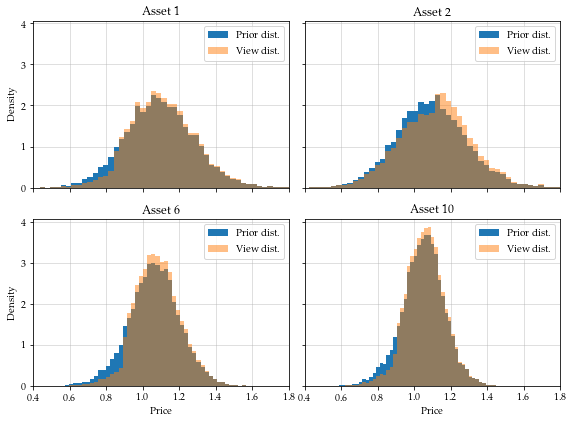

In [1171]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 1 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [1, 2, 6, 10] # Which asset we apply a view on
which_quantile = [0.05, 0.5, 0.05, 0.05] # The quantile of interest
target_for_quantile = [0.85, 1.13, 0.9, 0.9] # The target value we set for the quantile

p_tilde_oney = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (8, 6), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest
    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_oney[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_oney[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

ax[0, 0].grid(alpha = 0.5)
ax[0, 0].set_axisbelow(True)
ax[0, 1].grid(alpha = 0.5)
ax[0, 1].set_axisbelow(True)
ax[1, 0].grid(alpha = 0.5)
ax[1, 0].set_axisbelow(True)
ax[1, 1].grid(alpha = 0.5)
ax[1, 1].set_axisbelow(True)
ax[0, 0].set_xlim(0.4, 1.8)

plt.tight_layout()
plt.savefig(filepath + "\\1yrReturnsPriorandViewDistr.pdf", bbox_inches='tight')
plt.show()    

In [1172]:
# It does not make sense to plot a histogram of asset prices multiplied by their respective p-thilde probabilities. The reason
# is that then we are plotting the weighted asset values - which is dissimilar to plotting the asset values with NEW frequencies.


### 5 year horizon: Asset 2 (95% to 2.2), asset 3 (95% to 2.2), asset 8 (5% to 1), asset 10 (5% to 1)

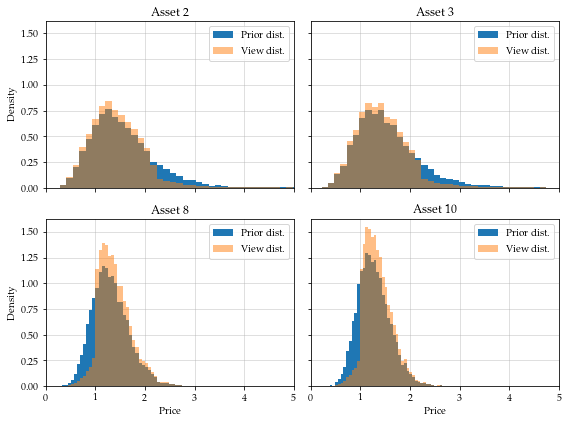

In [1173]:
# H matrix specifies the linear equality constraints
# We add the constraint that the weights need to sum to one 

horizon = 5 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [2, 3, 8, 10] # Which asset we apply a view on
which_quantile = [0.95, 0.95, 0.05, 0.05] # The quantile of interest
target_for_quantile = [2.2, 2.2, 1, 1] # The target value we set for the quantile

p_tilde_fivey = dict()

order_one = [0, 0, 1, 1]
order_two = [0, 1, 0, 1]

fig, ax = plt.subplots(2, 2, figsize = (8, 6), sharex = True, sharey = True)

for i, j, k, l, m in zip(which_asset, which_quantile, target_for_quantile, order_one, order_two):
    
    bool_vector = np.array((asset[i].iloc[horizon, :] < k) * 1) # Vector of 1's and 0's
    H_matrix = np.vstack((np.ones(num_sim), bool_vector)) # Linear equality constraints
    h_vector = np.array([1.0, j]) # Weights add to 1, view on the quantile of interest

    # Maximize Lagrangian dual 
    # x0 are the start values for the Lagrangian multipliers in vector v

    res = optimize.minimize(fun = lagrangian_dual_function, x0 = [0.0, 0.0], args = (init_probs, H_matrix, h_vector))

    # Calculate p tilde, i.e., the probabilities that makes the posterior distribution satisfy our view(s) while preserving as much
    # of the structure of the prior distribution

    p_tilde_fivey[i] = calculate_p_tilde(res.x, init_probs, H_matrix)
    
    # Plotting asset distributions
    
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, density = True, label = "Prior dist.")
    ax[l, m].hist(asset[i].iloc[horizon, :], bins = 50, weights = p_tilde_fivey[i], density = True, alpha = 0.5, label = "View dist.")

    ax[l, m].set_title("Asset {}".format(i))
    ax[l, m].legend()

ax[1, 0].set_xlabel('Price')    
ax[1, 1].set_xlabel('Price')        
ax[0, 0].set_ylabel('Density')    
ax[1, 0].set_ylabel('Density') 

ax[0, 0].grid(alpha = 0.5)
ax[0, 0].set_axisbelow(True)
ax[0, 1].grid(alpha = 0.5)
ax[0, 1].set_axisbelow(True)
ax[1, 0].grid(alpha = 0.5)
ax[1, 0].set_axisbelow(True)
ax[1, 1].grid(alpha = 0.5)
ax[1, 1].set_axisbelow(True)
ax[0, 0].set_xlim(0, 5)

plt.tight_layout()
plt.savefig(filepath + "\\5yrReturnsPriorandViewDistr.pdf", bbox_inches='tight')
plt.show()    

### Summary statistics for 1-year horizon posterior distributions 

In [1174]:
# Functions to calculate mean, variance, skewness and kurtosis for the posterior distributions (with weights p-thilde)

def weighted_mean(var, wts):
    """Calculates the weighted mean"""
    return np.average(var, weights=wts)

def weighted_variance(var, wts):
    """Calculates the weighted variance"""
    return np.average((var - weighted_mean(var, wts))**2, weights=wts)

def weighted_std(var, wts):
    """Calculates the weighted variance"""
    return np.sqrt(weighted_variance(var, wts))

def weighted_skew(var, wts):
    """Calculates the weighted skewness"""
    return (np.average((var - weighted_mean(var, wts))**3, weights=wts) /
            weighted_variance(var, wts)**(1.5))

def weighted_kurtosis(var, wts):
    """Calculates the weighted skewness"""
    return (np.average((var - weighted_mean(var, wts))**4, weights=wts) /
            weighted_variance(var, wts)**(2))

In [1175]:
# Descriptive stats 1 year horizon posterior distributions

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
posterior_1y_descr = pd.DataFrame(columns = columns, index = [1, 2, 6, 10])

for i in [1, 2, 6, 10]:
    posterior_1y_descr["Mean"].loc[i] = weighted_mean(asset[i].iloc[horizon, :], p_tilde_oney[i])  
    posterior_1y_descr["Standard deviation"].loc[i] = weighted_std(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["Skewness"].loc[i] = weighted_skew(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["Kurtosis"].loc[i] = weighted_kurtosis(asset[i].iloc[horizon, :], p_tilde_oney[i])
    posterior_1y_descr["5th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.05, p_tilde_oney[i])
    posterior_1y_descr["Median"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.5, p_tilde_oney[i])
    posterior_1y_descr["95th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.95, p_tilde_oney[i])

print(posterior_1y_descr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   Mean & Standard deviation & Skewness & Kurtosis & 5th percentile & Median & 95th percentile \\
\midrule
1  & 1.1091 &             0.1787 &   0.2933 &   3.4474 &         0.8499 & 1.0996 &          1.4164 \\
2  & 1.1207 &             0.1943 &   0.0651 &   3.2086 &         0.8000 & 1.1300 &          1.4426 \\
6  & 1.0810 &             0.1269 &   0.1180 &   3.5554 &         0.9000 & 1.0768 &          1.2958 \\
10 & 1.0612 &             0.1070 &  -0.0232 &   3.5936 &         0.9000 & 1.0613 &          1.2355 \\
\bottomrule
\end{tabular}



In [1176]:
# Descriptive stats 5 year horizon posterior distributions

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "Median", "95th percentile"]
posterior_5y_descr = pd.DataFrame(columns = columns, index = [2, 3, 8, 10])

for i in [2, 3, 8, 10]:
    posterior_5y_descr["Mean"].loc[i] = weighted_mean(asset[i].iloc[horizon, :], p_tilde_fivey[i])  
    posterior_5y_descr["Standard deviation"].loc[i] = weighted_std(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["Skewness"].loc[i] = weighted_skew(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["Kurtosis"].loc[i] = weighted_kurtosis(asset[i].iloc[horizon, :], p_tilde_fivey[i])
    posterior_5y_descr["5th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.05, p_tilde_fivey[i])
    posterior_5y_descr["Median"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.5, p_tilde_fivey[i])
    posterior_5y_descr["95th percentile"].loc[i] = weighted_percentile(asset[i].iloc[horizon, :], 0.95, p_tilde_fivey[i])

print(posterior_5y_descr.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   Mean & Standard deviation & Skewness & Kurtosis & 5th percentile & Median & 95th percentile \\
\midrule
2  & 1.4263 &             0.5111 &   0.9670 &   6.0371 &         0.6977 & 1.3784 &          2.2000 \\
3  & 1.4253 &             0.5067 &   0.9610 &   5.8472 &         0.7099 & 1.3769 &          2.2000 \\
8  & 1.3960 &             0.3262 &   0.7659 &   4.0671 &         1.0000 & 1.3473 &          2.0122 \\
10 & 1.3494 &             0.2859 &   0.7172 &   4.0453 &         1.0000 & 1.3088 &          1.8756 \\
\bottomrule
\end{tabular}



### Portfolio optimization with views

In [1177]:
# Function to calculate the new probabilities

def calculate_p_tilde(v, p, H_matrix):
    
    temp = np.log(p) - 1.0 - np.transpose(H_matrix) @ v
    
    return np.exp(temp)

# Lagrangian dual function that we wish to optimize w.r.t. v (Lagrangian multiplier)
# This is a Lagrandian *dual* function, because we let x be a function of the Lagrangian multiplier, v, in the sense that
# x is defined in terms of the function 'calculate_p_tilde', which is a function of v

def lagrangian_dual_function(v, p, H_matrix, h_vector):
    
    x = calculate_p_tilde(v, p, H_matrix)
    x = np.maximum(x, 10 ** (-32))
    
    lagrangian = x.T @ (np.log(x) - np.log(p)) + v @ (H_matrix @ x - h_vector)
    
    return -lagrangian

In [1178]:
# Objective function

def OptPFWeightsRockafellerCVaRwithViews(x: np.array, horizon: int, cum_lin_ret_np: np.array, beta: int, probs: np.array):

    w = x[0:-1]
    alpha = x[-1]
    
    pf_return = (cum_lin_ret_np @ w).T
    
    tail_scenarios = np.maximum(-pf_return[horizon, :] - alpha, 0.0)
    
    obj_func = alpha + (probs @ tail_scenarios) / (1-beta)
    
    return obj_func

#### 1 year horizon

In [1179]:
# matrix specifying the data to apply views on
# we add the constraint that the weights need to sum to one 

horizon = 1 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [1, 2, 6, 10] # Which asset we apply a view on
which_quantile = [0.05, 0.5, 0.05, 0.05] # The quantile of interest
target_for_quantile = [0.85, 1.13, 0.9, 0.9] # The target value we set for the quantile

bool_vector_one = dict()

for i, k in zip(which_asset, target_for_quantile):
    bool_vector_one[i] = np.array((asset[i].iloc[horizon, :] < k) * 1)
    
H_matrix = np.vstack((np.ones(num_sim), bool_vector_one[1], bool_vector_one[2], bool_vector_one[6], bool_vector_one[10]))
h_vector = np.array([1.0, 0.05, 0.5, 0.05, 0.05])    

# maximize dual lagrangian 
res = optimize.minimize(lagrangian_dual_function, [0.0] * len(h_vector), args = (init_probs, H_matrix, h_vector))

# calculate p tilde
p_tilde_portfolio_oney = calculate_p_tilde(res.x, init_probs, H_matrix)

In [1180]:
# Optimal portfolio weights with views using Rockafeller 95% CVaR minimization and 8% target

target = 0.08

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_oney) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaf_views_oney = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwrockaf_views_oney.x.round(4))
print(optwrockaf_views_oney)

[0.0986 0.2036 0.1197 0.1641 0.1494 0.1749 0.     0.0436 0.0197 0.0264
 0.0929]
     fun: 0.16760967007951866
     jac: array([ 0.18661191,  0.19135249,  0.18574954,  0.17540222,  0.15297785,
        0.14251136,  0.14062385,  0.13228834,  0.13185925,  0.12213761,
       -0.00147085])
 message: 'Optimization terminated successfully'
    nfev: 406
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([9.86072345e-02, 2.03616818e-01, 1.19656675e-01, 1.64110184e-01,
       1.49409753e-01, 1.74882068e-01, 1.28882385e-19, 4.36320774e-02,
       1.96623909e-02, 2.64227993e-02, 9.28896206e-02])


#### 5 year horizon

In [1181]:
# matrix specifying the data to apply views on
# we add the constraint that the weights need to sum to one 

horizon = 5 # Horizon 1 or 5
num_sim = 10000 # 10,000 simulations per asset
init_probs = np.array([1 / num_sim] * num_sim) # Initial probabilities

which_asset = [2, 3, 8, 10] # Which asset we apply a view on
which_quantile = [0.95, 0.95, 0.05, 0.05] # The quantile of interest
target_for_quantile = [2.2, 2.2, 1, 1] # The target value we set for the quantile

bool_vector_five = dict()

for i, k in zip(which_asset, target_for_quantile):
    bool_vector_five[i] = np.array((asset[i].iloc[horizon, :] < k) * 1)
    
H_matrix = np.vstack((np.ones(num_sim), bool_vector_five[2], bool_vector_five[3], bool_vector_five[8], bool_vector_five[10]))
h_vector = np.array([1.0, 0.95, 0.95, 0.05, 0.05])    

# maximize dual lagrangian 
res = optimize.minimize(lagrangian_dual_function, [0.0] * len(h_vector), args = (init_probs, H_matrix, h_vector))

# calculate p tilde
p_tilde_portfolio_fivey = calculate_p_tilde(res.x, init_probs, H_matrix)

In [1182]:
# Optimal portfolio weights with views using Rockafeller 95% CVaR minimization and 45% target

target = 0.45

def cons_1(x):
    return np.sum(x[:-1]) - 1

def cons_2(x, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target

# Minimizing objective function (Rockafeller CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_fivey) # Exogenous input
x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwrockaf_views_fivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
print(optwrockaf_views_fivey.x.round(4))
print(optwrockaf_views_fivey)

[ 0.0785  0.1892  0.1514  0.1583  0.1534  0.      0.114   0.1329  0.
  0.0222 -0.0239]
     fun: 0.08450003937756448
     jac: array([ 0.13184625,  0.13248052,  0.12871369,  0.10397111,  0.05420246,
        0.07503687,  0.02985078,  0.01202168,  0.07443044, -0.00770374,
        0.00046242])
 message: 'Optimization terminated successfully'
    nfev: 459
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([ 7.85460211e-02,  1.89162073e-01,  1.51429080e-01,  1.58301770e-01,
        1.53410153e-01,  6.16638132e-18,  1.14022739e-01,  1.32884137e-01,
        5.53758632e-18,  2.22440271e-02, -2.39116624e-02])


## Plot of asset allocation in Rockafeller 95% CVaR minimization with and without views for 1 year horizon

In [1183]:
# One year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, without views

targets = np.linspace(0.05, 0.09, 21)
opt_weight_Rocka_no_views_one_year = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockanoviewsoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockanoviewsoney.x.round(4)
    
    opt_weight_Rocka_no_views_one_year.append(optwrockanoviewsoney.x[:-1])

In [1184]:
# One year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, with views

targets = np.linspace(0.05, 0.09, 21)
opt_weight_Rocka_with_views_one_year = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_oney) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockawithviewsoney = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockawithviewsoney.x.round(4)
    
    opt_weight_Rocka_with_views_one_year.append(optwrockawithviewsoney.x[:-1])

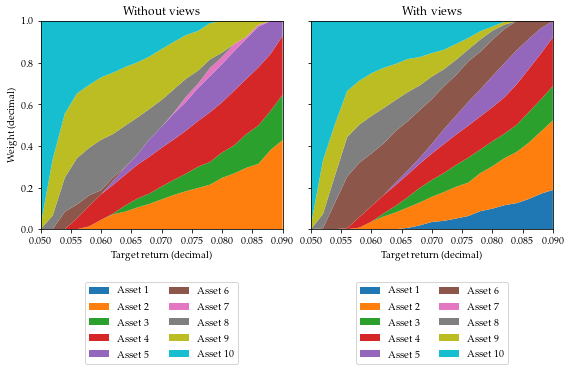

In [1185]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (8, 6), sharex = True, sharey = True)

# Without views
ax[0].stackplot(targets, np.array(opt_weight_Rocka_no_views_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);
ax[0].set_title("Without views")

# With views
ax[1].stackplot(targets, np.array(opt_weight_Rocka_with_views_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")
ax[1].set_title("With views")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);

fig.tight_layout()
plt.savefig(filepath + "\\1YearRockafellarWeightsViewsandNoViews.pdf", bbox_inches='tight')
plt.show()

## Plot of asset allocation in Rockafeller 95% CVaR minimization with and without views for 5 year horizon

In [1186]:
# Five year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, without views

targets = np.linspace(0.3, 0.5, 41)
opt_weight_Rocka_no_views_five_years = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockanoviewsfivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockanoviewsfivey.x.round(4)
    
    opt_weight_Rocka_no_views_five_years.append(optwrockanoviewsfivey.x[:-1])

In [1187]:
# Five year optimal portfolio weights for different targets return, minimizing Rockafeller CVaR, with views

targets = np.linspace(0.3, 0.5, 41)
opt_weight_Rocka_with_views_five_years = list()

for target in targets:
    def cons_1(x):
        return np.sum(x[:-1]) - 1

    def cons_2(x, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ x[:-1]).T[horizon, :]) - target
    
    # Minimizing objective function w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) + [(None, None)] # No shorting constraint. No constraint on alpha
    args = (horizon, cum_lin_ret_np, 0.95, p_tilde_portfolio_fivey) # Exogenous input
    x0 = np.r_[[1/10] * len(asset), 0.2] # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwrockawithviewsfivey = optimize.minimize(fun = OptPFWeightsRockafellerCVaRwithViews, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwrockawithviewsfivey.x.round(4)
    
    opt_weight_Rocka_with_views_five_years.append(optwrockawithviewsfivey.x[:-1])

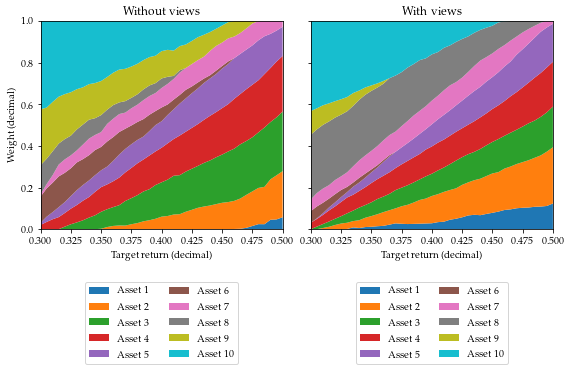

In [1188]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (8, 6), sharex = True, sharey = True)

# Without views
ax[0].stackplot(targets, np.array(opt_weight_Rocka_no_views_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);
ax[0].set_title("Without views")

# With views
ax[1].stackplot(targets, np.array(opt_weight_Rocka_with_views_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")
ax[1].set_title("With views")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.45), ncol=2);

fig.tight_layout()
plt.savefig(filepath + "\\5YearRockafellarWeightsViewsandNoViews.pdf", bbox_inches='tight')
plt.show()